In [8]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
import matplotlib as plt
class myrobo(DHRobot):
    
    def __init__(self):
        super().__init__(
                [
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                ], name="KR300")
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

[0.56552888 0.94974939 0.65431906 0.06263543 0.257471   0.88639196] DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
│  q2       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│  q3 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q4       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q5       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q6       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90°

Restarted deepsys (Python 3.11.3)

In [7]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
class myrobo(DHRobot):
    
    def __init__(self):
        super().__init__(
                [
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                qz = np.array([0, 0, 0, 0, 0, 0])], name="KR300")
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2514221585.py, line 96)

In [ ]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
class myrobo(DHRobot):
    
    def __init__(self):
        super().__init__(
                [
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                self.qz = np.array([0, 0, 0, 0, 0, 0])], name="KR300")
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

SyntaxError: cannot assign to attribute here. Maybe you meant '==' instead of '='? (<ipython-input-2-ad8c5efbf307>, line 96)

In [ ]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
class myrobo(DHRobot):
    
    def __init__(self):
        super().__init__(
                [
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                ], name="KR300",)
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

[0.37280342 0.62697256 0.44502546 0.12075547 0.33376508 0.78743485] DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
│  q2       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│  q3 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q4       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q5       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q6       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90°

In [ ]:
t.L

AttributeError: 'myrobo' object has no attribute 'L'

In [ ]:
t.__attributes__

AttributeError: 'myrobo' object has no attribute '__attributes__'

In [ ]:
t

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
│  q2       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│  q3 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q4       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q5       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q6       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

In [ ]:
t[0]

RevoluteDH(d=0.675, a=0.35, ⍺=-1.57, name = "link1", isflip=1, qlim=[-2.57, 2.57], m=402, r=[-0.352, 0.17, -0.0114], I=[17.4, 31.8, 34.9, 2.46, -4.47, -0.123], Jm=0.00923, B=0.00215, Tc=[0.893, -0.893], G=213)

In [ ]:
pyplot = rtb.backends.PyPlot()  # create a PyPlot backend
pyplot.add(t)              # add the robot to the backend
t.q = t.qz             # set the robot configuration
pyplot.step()   

TypeError: 'module' object is not callable

In [ ]:
import roboticstoolbox as rtb
pyplot = rtb.backends.PyPlot()  # create a PyPlot backend
pyplot.add(t)              # add the robot to the backend
t.q = t.qz             # set the robot configuration
pyplot.step()   

TypeError: 'module' object is not callable

In [ ]:
import roboticstoolbox as rtb
pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.add(t)              # add the robot to the backend
t.q = t.qz             # set the robot configuration
pyplot.step()   

AttributeError: 'PyPlot' object has no attribute 'ax'

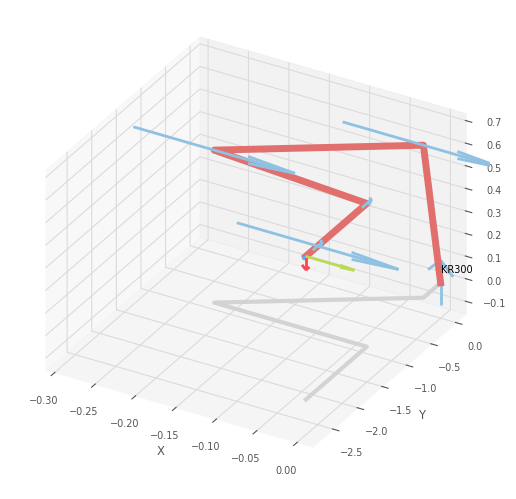

<Figure size 640x480 with 0 Axes>

In [27]:
import roboticstoolbox as rtb
pyplot = rtb.backends.PyPlot.PyPlot()  # create a PyPlot backend
pyplot.launch()
pyplot.add(t)              # add the robot to the backend
t.q = t.qz             # set the robot configuration
pyplot.step()  

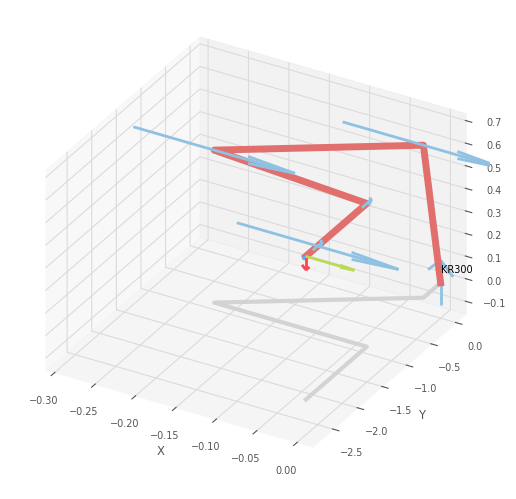

<Figure size 640x480 with 0 Axes>

IKSolution: q=[[-1.107, -3.112, -1.317, 3.142, -2.859, 2.678],
 [-1.061, -3.102, -1.365, 3.142, -2.896, 2.632],
 [-0.9048, -3.083, -1.478, -3.142, -2.99, 2.476],
 [-0.588, -3.072, -1.577, -3.142, -3.078, 2.159],
 [-0.1799, -3.075, -1.544, 3.142, -3.048, 1.751],
 [0.1526, -3.106, -1.346, -3.142, -2.881, 1.418],
 [0.3805, 3.074, -0.9632, -3.142, -2.602, 1.19],
 [0.5105, 2.76, -0.1666, 3.142, -2.119, 1.06],
 [-2.571, 1.205, -1.406, 3.142, 1.37, -2.141],
 [-2.554, 1.158, -1.337, -3.142, 1.391, -2.159]], success=True, iterations=299, searches=16, residual=3.05e-12


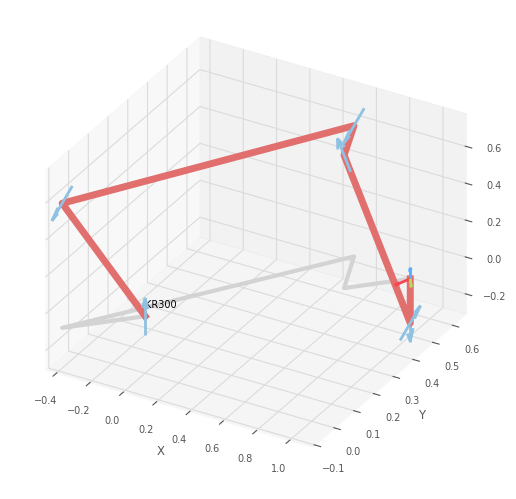

<Figure size 640x480 with 0 Axes>

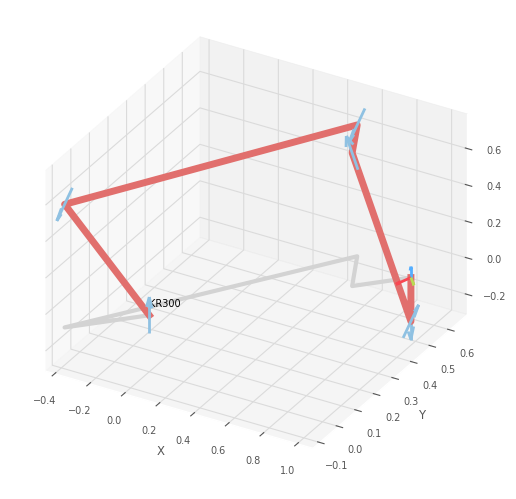

<Figure size 640x480 with 0 Axes>

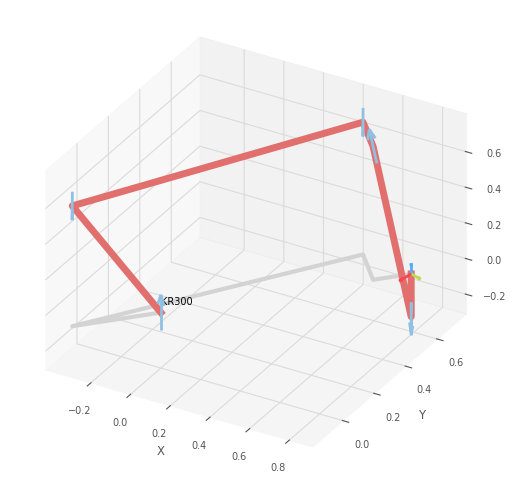

<Figure size 640x480 with 0 Axes>

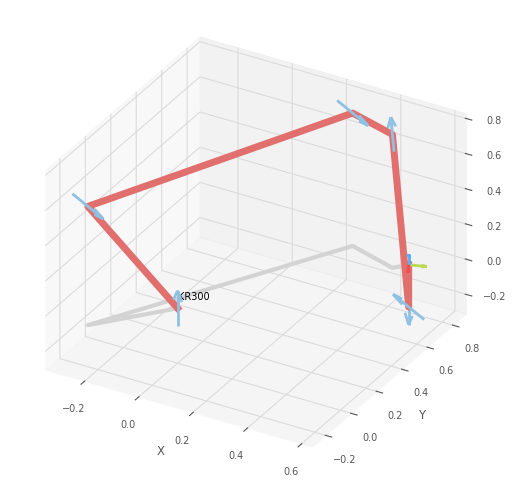

<Figure size 640x480 with 0 Axes>

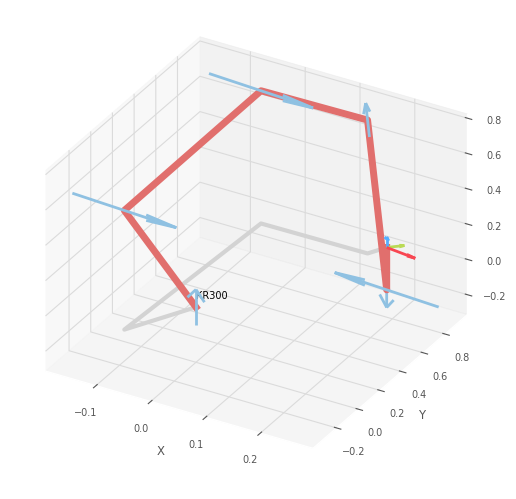

<Figure size 640x480 with 0 Axes>

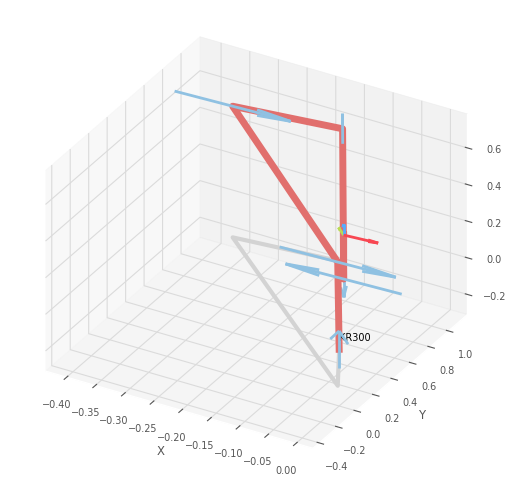

<Figure size 640x480 with 0 Axes>

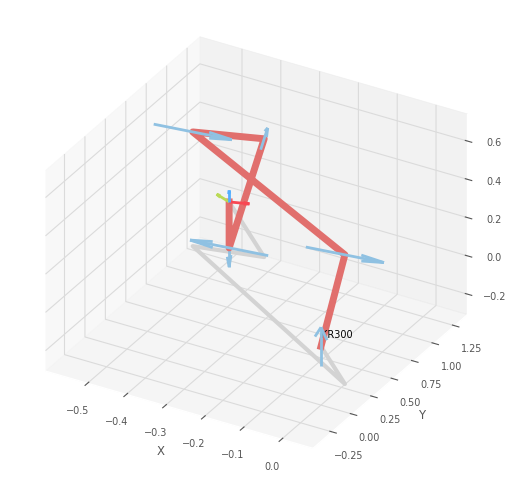

<Figure size 640x480 with 0 Axes>

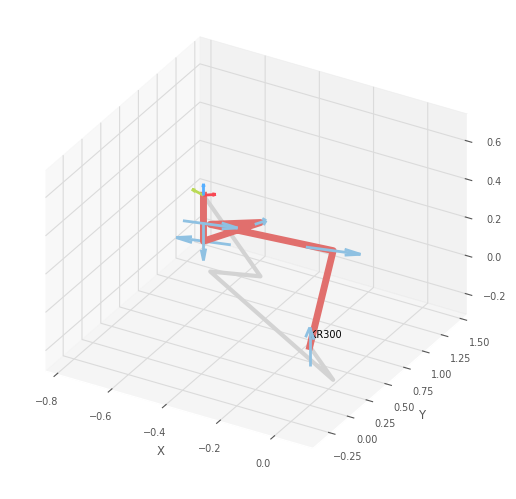

<Figure size 640x480 with 0 Axes>

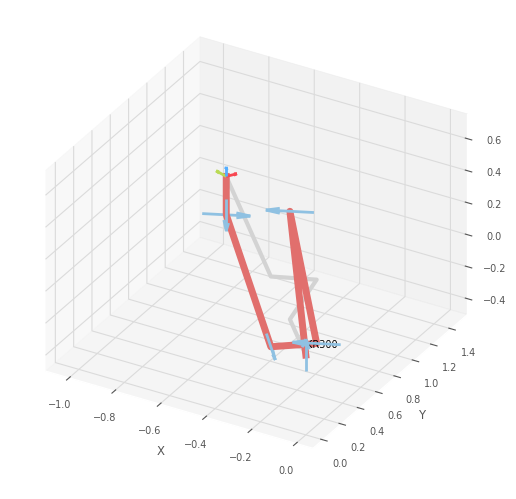

<Figure size 640x480 with 0 Axes>

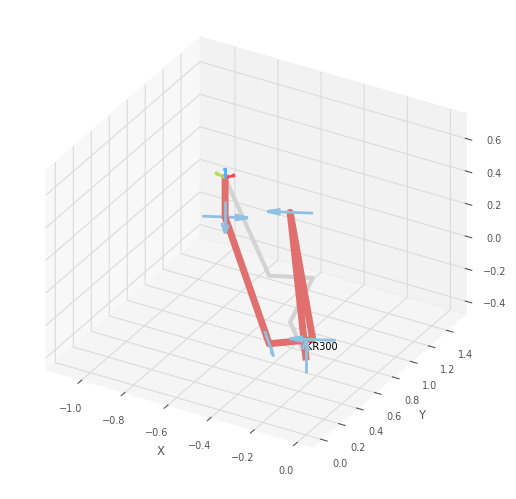

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [56]:
from spatialmath import SE3, SE2
time = np.arange(0, 1, 0.1)  # time
T0 = SE3(-1, 0.5, 0,)  # initial pose
T1 = SE3(1, 1.5, 0)  # final pose
Ts = rtb.tools.trajectory.ctraj(T0, T1, time)
robot_fig = t.plot([0, 0,0,0,0,0])
robot_fig.add(t)
robot_fig.ax.set(xlim=(-1.5,
                       2), ylim=(-1.5, 2))

sol = t.ikine_LM(Ts)
print(sol)
for q in sol.q:
    t.q = q  # set the robot configuration
    # robot_fig.clf()
    t.plot(q)
    # print(q)
# robot_fig.hold()

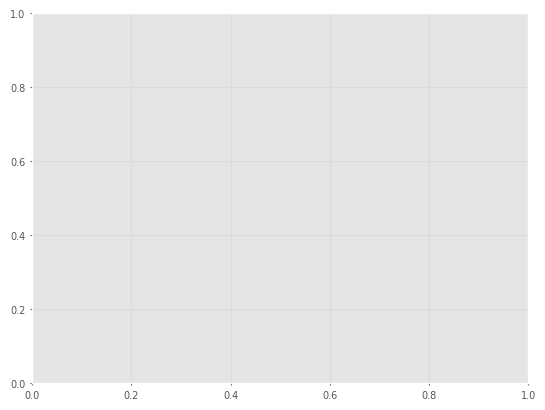

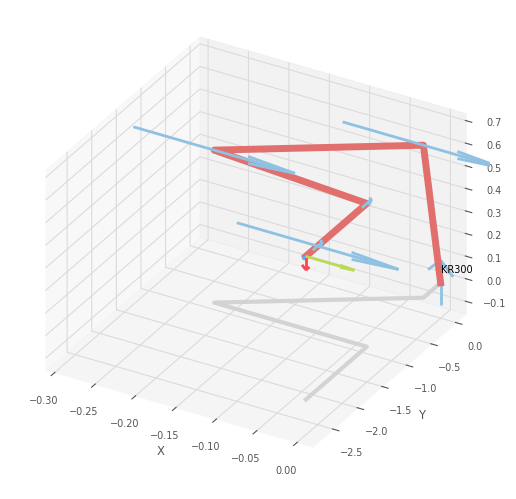

<Figure size 640x480 with 0 Axes>

In [10]:
from spatialmath import SE3, SE2
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from functools import partial

def update(data, robot, plot_moment,frame):
    # Clear the previous plot
    plt.cla()
    plot_moment.close()
    # for q in data.q
    robot.plot(data.q[frame])
    plot_moment.add(robot)

    # plot_moment.xlabel('X')
    # plot_moment.ylabel('Y')
    # plot_moment.title('Robot Animation')


    # Create a figure and axis object
fig, ax = plt.subplots()
time = np.arange(0, 5, 0.1)  # time
T0 = SE3(-1, 0.5, 0,)  # initial pose
T1 = SE3(1, 1.5, 0)  # final pose
Ts = rtb.tools.trajectory.ctraj(T0, T1, time)
pyplot = rtb.backends.PyPlot.PyPlot() 
robot_fig = t.plot([0, 0,0,0,0,0])

robot_fig.ax.set(xlim=(-1.5,
                    2), ylim=(-1.5, 2))

sol = t.ikine_LM(Ts)
# Set the axis limits if needed
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
# Create the animation
animation = FuncAnimation(fig, partial(update,data=sol, robot = t, plot_moment =robot_fig), frames=10)

# Display the animation
plt.show()

IKSolution: q=[[2.034, -0.008786, 1.93, 3.142, -2.791, -0.4636],
 [2.08, 0.004925, 1.956, 3.142, -2.752, -0.5096],
 [-0.9048, -3.083, -1.478, 3.142, -2.99, 2.476],
 [-0.588, -3.072, -1.577, 3.142, -3.078, 2.159],
 [-0.1799, -3.075, -1.544, -3.142, -3.048, 1.751],
 [0.1526, -3.106, -1.346, 3.142, -2.881, 1.418],
 [0.3805, 3.074, -0.9632, 3.142, -2.602, 1.19],
 [0.5105, 2.76, -0.1678, -3.142, -2.12, 1.06],
 [-2.571, -0.04699, 1.324, 3.142, 2.848, -2.141],
 [-2.554, -0.03369, 1.255, 3.142, 2.793, -2.159]], success=True, iterations=222, searches=12, residual=3.83e-10


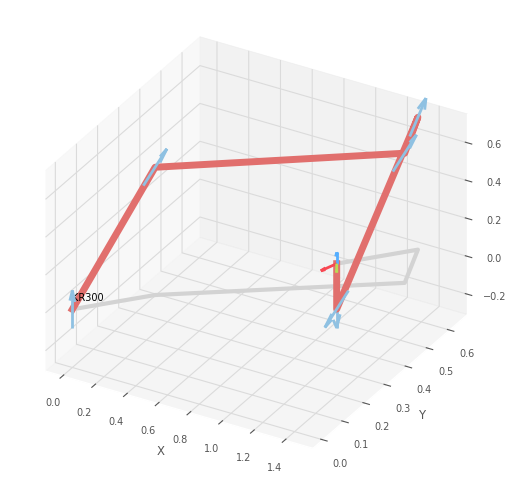

PyPlot3D backend, t = 0.49999999999999994, scene:
  robot: Text(0.0, 0.0, 'KR300')

<Figure size 640x480 with 0 Axes>

In [59]:
from spatialmath import SE3, SE2
import imageio
from io import BytesIO
time = np.arange(0, 1, 0.1)  # time
T0 = SE3(-1, 0.5, 0,)  # initial pose
T1 = SE3(1, 1.5, 0)  # final pose
Ts = rtb.tools.trajectory.ctraj(T0, T1, time)
# robot_fig = t.plot([0, 0,0,0,0,0])
# robot_fig.add(t)
# robot_fig.ax.set(xlim=(-1.5,
#                        2), ylim=(-1.5, 2))

sol = t.ikine_LM(Ts)
print(sol)
t.plot(sol.q, movie = "here.gif")
# robot_fig.hold()

In [3]:
from scipy.io import loadmat


file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data_with_val.mat"
# read the file into variable
file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data.mat"



df_industRobo =  loadmat(file_name_train)

u_train = df_industRobo["u_train"]
y_train = df_industRobo["y_train"]
# u_val   = df_industRobo["u_val"]
# y_val   = df_industRobo["y_val"]
u_test  = df_industRobo["u_test"]
y_test  = df_industRobo["y_test"]
time_test  = df_industRobo["time_test"]
time_train  = df_industRobo["time_train"]
u_train = np.asarray(u_train).T
y_train = np.asarray(y_train).T
# u_val = np.asarray(u_val).T
# y_val = np.asarray(y_val).T
u_test = np.asarray(u_test).T
y_test = np.asarray(y_test).T
time_test = np.asarray(time_test).T
# time_val = np.asarray(time_val).T
time_train = np.asarray(time_train).T

In [4]:
(u_train/180*np.pi).shape

(39988, 6)

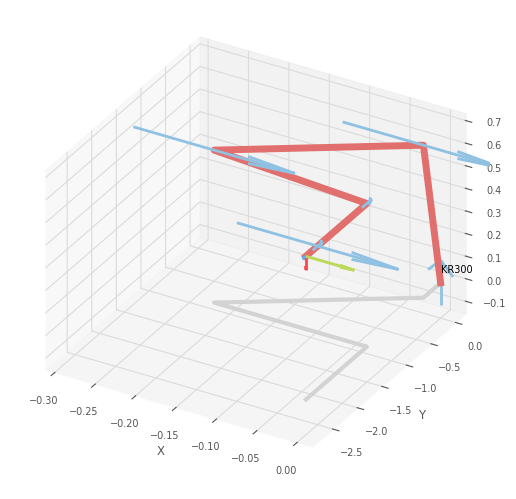

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'KR300')

<Figure size 640x480 with 0 Axes>

In [92]:
t.plot((y_test/180*np.pi)[0,:])

In [105]:
tau = t.fdyn(u_test, y_test[0]) 

ValueError: T must be a scalar

In [106]:
y_test[0]

array([ 2.10999981e-05, -3.30686453e-05,  6.52725426e-04, -1.55634212e-07,
       -5.73246501e-07, -7.05125013e-08])

In [5]:
import numpy as np

def calculate_velocity_and_acceleration(time_sequence, positions):
    """
    Calculate velocity and acceleration given a time sequence and corresponding positions.
    
    Parameters:
        time_sequence (list or numpy array): Time sequence.
        positions (numpy array): Matrix where rows are different time frames and columns are different joints.
        
    Returns:
        tuple: Tuple containing velocities and accelerations corresponding to the time sequence and positions.
    """
    num_time_frames, num_joints = positions.shape
    velocities = np.zeros_like(positions)
    accelerations = np.zeros_like(positions)
    
    # Calculate velocities
    for joint in range(num_joints):
        for i in range(1, num_time_frames):
            displacement = positions[i, joint] - positions[i-1, joint]
            time_interval = time_sequence[i] - time_sequence[i-1]
            velocities[i, joint] = displacement / time_interval
    
    # Calculate accelerations
    for joint in range(num_joints):
        for i in range(1, num_time_frames):
            velocity_change = velocities[i, joint] - velocities[i-1, joint]
            time_interval = time_sequence[i] - time_sequence[i-1]
            accelerations[i, joint] = velocity_change / time_interval
    
    return velocities, accelerations


In [6]:
y_test=y_test/180*np.pi
velocities,accelerations = calculate_velocity_and_acceleration(time_test, y_test)

/tmp/ipykernel_499822/2147027168.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  velocities[i, joint] = displacement / time_interval
/tmp/ipykernel_499822/2147027168.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accelerations[i, joint] = velocity_change / time_interval


0.11906986589961278

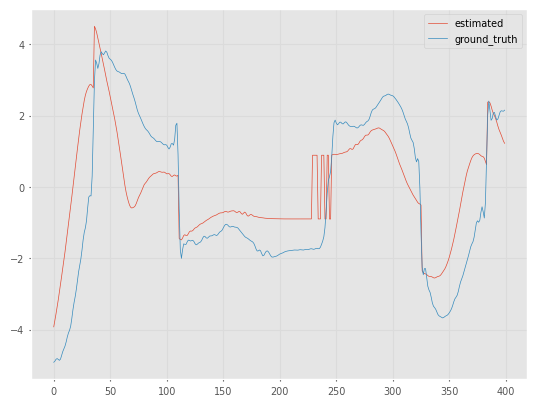

In [21]:
tau2 = t.rne(y_test, velocities,accelerations, gravity=[0,0,9.81])
plt.plot(tau2[1600:2000,0]/t.links[0].G, label = "estimated")
plt.plot(u_test[1600:2000,0],label = "ground_truth")
plt.legend()
np.sqrt(np.mean((tau2[:,0]-u_test[:,0])**2))/u_test.shape[0]
# plt.plot(tau[:300,3])
# plt.plot(tau3[:300,3])


In [119]:
tau

array([[-5.52593727e-20,  8.61970366e+03,  2.81206722e+03,
         5.15950926e+01,  3.77598135e+02,  2.68685035e+01],
       [-1.90005271e+02,  8.12014932e+03,  2.36195644e+03,
         1.46593445e+02,  4.72590037e+02,  8.18680834e+01],
       [-1.90058718e+02,  9.11929615e+03,  2.36218203e+03,
        -4.34037267e+01,  4.72606223e+02, -2.81316404e+01],
       ...,
       [-1.90012934e+02,  8.12030390e+03,  3.26208171e+03,
         1.46595185e+02,  4.72616521e+02,  8.18686545e+01],
       [-1.89961834e+02,  8.12046338e+03,  2.36211601e+03,
         1.46596105e+02,  4.72621989e+02, -2.81307938e+01],
       [-1.89964411e+02,  8.12072511e+03,  2.36220941e+03,
         1.46597254e+02,  2.82634281e+02, -2.81298915e+01]])

In [120]:
tau[:,0]

array([-5.52593727e-20, -1.90005271e+02, -1.90058718e+02, ...,
       -1.90012934e+02, -1.89961834e+02, -1.89964411e+02])

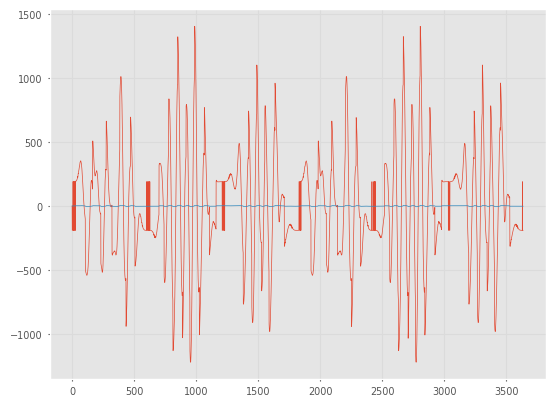

In [139]:
plt.plot(tau[:,0])
plt.plot(u_test[:,0])


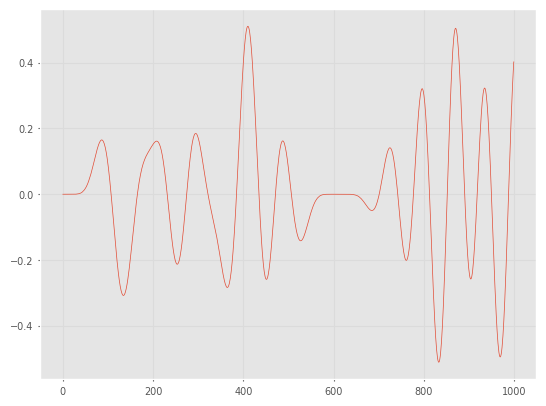

In [128]:
plt.plot(velocities[:1000,0])

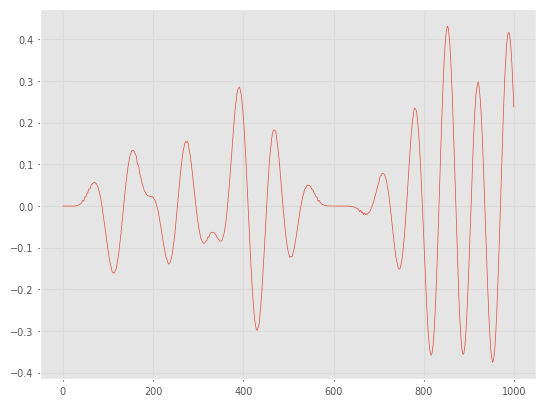

In [129]:
plt.plot(accelerations[:1000,0])


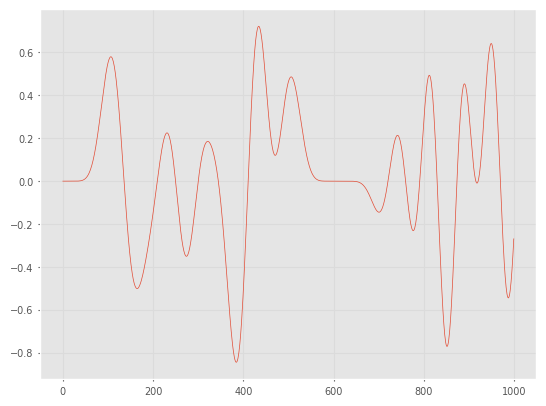

In [130]:
plt.plot(y_test[:1000,0])

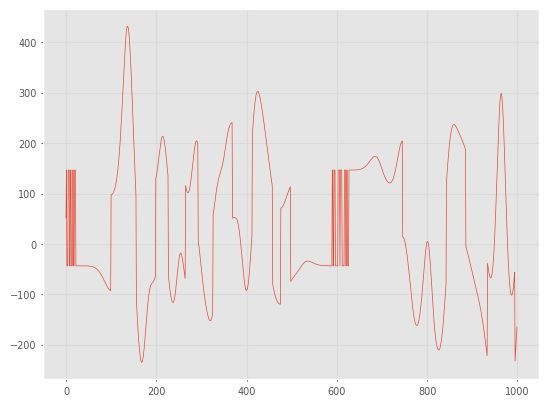

In [137]:
plt.plot(tau[:1000,3])

In [154]:
acc = t.accel(y_test, velocities,u_test,)

In [25]:
plt.plot(acc[2000:2800,0],color='r')
plt.plot(accelerations[2000:2800,0],color='b')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [26]:
acc

array([-0.0509998 , -3.92984998, -0.8444068 , -2.69275175, -1.46595166,
       -2.84264781])

In [24]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
class myrobo(DHRobot):
    
    def __init__(self):
        super().__init__(
                [
                    RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,                                                          # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-147*np.pi/180, 147*np.pi/180],                                                 # maximum backward and forward link rotation
                            offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-140*np.pi/180, -5*np.pi/180],
                            offset= 0*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-112*np.pi/180, 153*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-350*np.pi/180, 350*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-122.5*np.pi/180, 122.5*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 159.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-350*np.pi/180, 350*np.pi/180]
                               ),
                ], name="KR300")
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180
        
dof = 6
t = myrobo() 
t.qz = np.random.rand(dof) 
print(t.qz,t)
t.qr = np.array([0, -2/3*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
t.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
t.qt = np.pi / 180
acc = t.accel(t.qz,np.random.rand(dof) , np.random.rand(dof) )
print(t,acc, t.gravity)
print(t.inertia(t.qz))

[0.39929209 0.14479179 0.27172172 0.09805871 0.73804081 0.02038018] DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90° │  0.675 │  0.35 │ -90.0° │ -147.0° │ 147.0° │
│  q2       │ -0.189 │  1.15 │   0.0° │ -140.0° │  -5.0° │
│  q3 + 90° │  0.189 │ 0.041 │ -90.0° │ -112.0° │ 153.0° │
│  q4       │     -1 │     0 │  90.0° │ -350.0° │ 350.0° │
│  q5       │      0 │     0 │ -90.0° │ -122.5° │ 122.5° │
│  q6       │  -0.24 │     0 │ 180.0° │ -350.0° │ 350.0° │
└───────────┴────────┴───────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

DHRobot: KR300, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬────────┬───────┬────────┬─────────┬────────┐
│    θⱼ     │   dⱼ   │  aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼────────┼───────┼────────┼─────────┼────────┤
│ -q1 - 90°

In [166]:
print(t.links[0].dyn())

m     =         0 
r     =     -0.35     0.17   -0.011 
        |       17      2.5     -4.5 | 
I     = |      2.5       32    -0.12 | 
        |     -4.5    -0.12       35 | 
Jm    =    0.0092 
B     =    0.0022 
Tc    =      0.89(+)    -0.89(-) 
G     =   2.1e+02 
qlim  =      -2.6 to      2.6


In [174]:
t.G

AttributeError: 'myrobo' object has no attribute 'G'